In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[Datos del estudio](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

### Columnas

1. **age**: Edad del paciente en años
2. **sex**: Sexo del paciente *(1 = male; 0 = female)*
3. **cp**: Tipo de dolor de pecho
    * Valor 1: Angina típica
    * Valor 2: Angina atípica
    * Valor 3: Dolor no anginoso
    * Valor 4: Asintomatico
4. **trestbps**: Presión sanguinea en reposo (En mm/Hg(milimetros de mercurio) al momento de ingresar al hospital)
5. **chol**: Colesterol total en la sangre en mg/dl
6. **fbs**: glucemia en ayunas > 120 mg/dl *(1 = true; 0 = false)*
7. **restecg**
    * Valor 0: normal
    * Valor 1: Presenta anomalias en onda ST-T *(inversiones de la onda T y / o elevación o depresión del ST de> 0,05 mV)*
    * Valor 2: que muestre hipertrofia ventricular izquierda probable o definitiva según los *criterios de Romhilt-Estes*
8. **thalach**: frecuencia cardíaca máxima alcanzada
9. **exang**: angina inducida por ejercicio *(1 = yes; 0 = no)*
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo
11. **slope**: pick de la pendiente del segmento ST de ejercicio
    * Valor 0: Subiendo
    * Valor 1: Plano
    * Valor 2: Bajando
12. **ca**: número de vasos principales (0-3) coloreados por la floración
13. **thal**:  Presencia de anemia hereditaria
    * 3: normal
    * 6: defecto fijo
    * 7: defecto reversible
14. **num**: diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)
    * Valor 0: < 50% Reducción del diametro
    * Valor 1: > 50% Reducción del diametro

In [2]:
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.dropna().describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Distribución de las edades

In [6]:
data['age'].min(), data['age'].max(), data['age'].max() - data['age'].min()

(29, 77, 48)

In [7]:
r = ((data['age'].max() - data['age'].min())/2)+1
divisions = list()
n = 2

for i in range(int(r)):
    v = int(data['age'].min()) + int(i)*n
    divisions.append(v)

In [8]:
len(divisions)-1

24

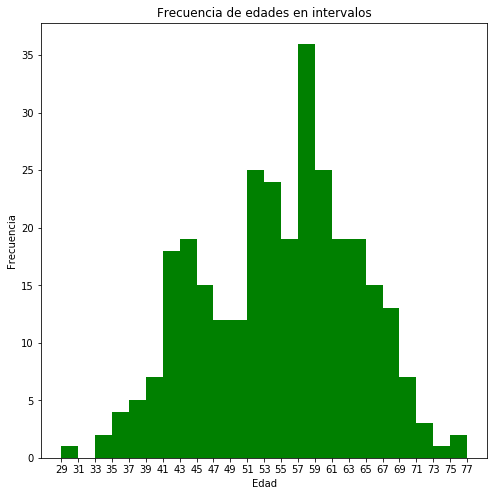

In [9]:
plt.figure(figsize = (8, 8))
plt.hist(data['age'], bins=divisions, color='green')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de edades en intervalos')
plt.xticks(divisions)
plt.show()

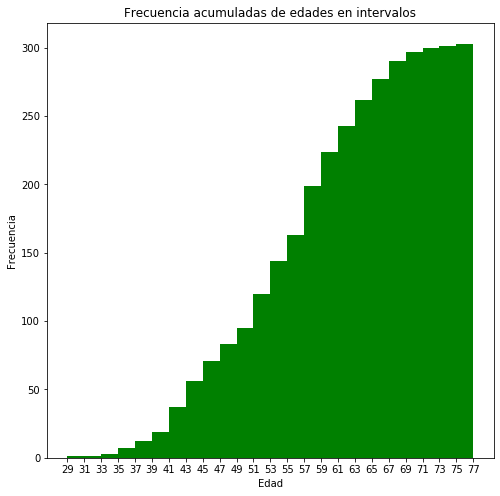

In [10]:
plt.figure(figsize = (8, 8))
plt.hist(data['age'], bins=divisions, color='green', cumulative=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia acumuladas de edades en intervalos')
plt.xticks(divisions)
plt.show()

# Histograma por formula

## Regla de Sturges

### Definir número k de clases

Regla de la raíz cuadrada $k\ =\ \sqrt{n}$

In [11]:
n = data['age'].shape[0]
print(f'Número de elementos: {n}')
k = np.sqrt(n)
k = int(np.ceil(k))
print(f'Número de clases: {k}')

Número de elementos: 303
Número de clases: 18


Límite inferior del primer intervalo: $L_1\ =\ min(x)\ -\ \frac{1}{2}\ \cdot\ precisión$

En este caso la presición será de 1 o una unidad

In [12]:
p = 1

In [13]:
data['age'].min(), data['age'].max()

(29, 77)

In [14]:
l1 = data['age'].min() - p / 2
l1

28.5

### Definimos la amplitud de los intervalos

In [15]:
a = (data['age'].max() - data['age'].min()) / k
a = int(np.ceil(a))
a

3

### Definimos los límites de los intervalos

In [16]:
limites = [l1 + a * i for i in range(k)]
limites

[28.5,
 31.5,
 34.5,
 37.5,
 40.5,
 43.5,
 46.5,
 49.5,
 52.5,
 55.5,
 58.5,
 61.5,
 64.5,
 67.5,
 70.5,
 73.5,
 76.5,
 79.5]

### Marcas de clase

In [17]:
x1 = (limites[0] + limites[1]) / 2
x = [x1 + a * i for i in range(k-1)]
x

[30.0,
 33.0,
 36.0,
 39.0,
 42.0,
 45.0,
 48.0,
 51.0,
 54.0,
 57.0,
 60.0,
 63.0,
 66.0,
 69.0,
 72.0,
 75.0,
 78.0]

In [18]:
len(x)

17

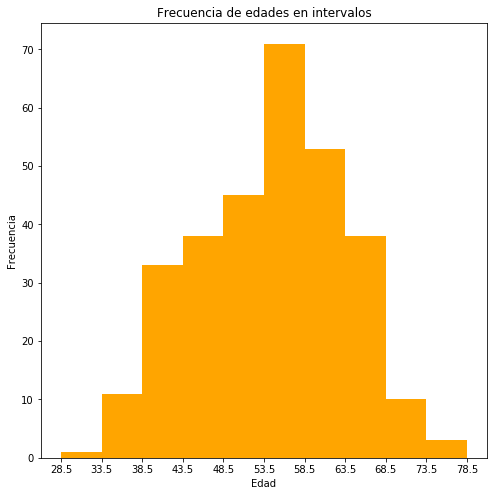

In [53]:
plt.figure(figsize = (8, 8))
plt.hist(data['age'], bins=limites, color='orange')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de edades en intervalos')
plt.xticks(limites)
plt.show()

## Regla de Freedman-Diaconis

### Determinar amplitud teorica de las clases

$$A_{FD}\ =\ 2\ \cdot\ (Q_{0.75}\ -\ Q_{0.25})\ \cdot\ n^{-\frac{1}{3}}$$

In [20]:
q3 = data['age'].quantile(0.75)
q1 = data['age'].quantile(0.25)
n = len(data['age'])

afd = 2 * (q3 - q1) * n ** (-1/3)
afd = int(np.ceil(afd))
print(f'Amplitud de los intervalos: {afd}')

Amplitud de los intervalos: 5


### Definir número k de clases

$$k\ =\ \left|\frac{max(x)\ -\ min(x)}{A_{FD}}\right|$$

In [21]:
k = int(np.ceil((max(data['age']) - min(data['age'])) / afd))
print(f'Número de clases: {k}')

Número de clases: 10


### Definimos los límites de los intervalos

In [22]:
l1 = data['age'].min() - p / 2
limites = [l1 + afd * i for i in range(k+1)]
limites

[28.5, 33.5, 38.5, 43.5, 48.5, 53.5, 58.5, 63.5, 68.5, 73.5, 78.5]

### Definimos las marcas de clase

In [23]:
x1 = (limites[0] + limites[1]) / 2
x = [x1 + afd * i for i in range(k)]
x

[31.0, 36.0, 41.0, 46.0, 51.0, 56.0, 61.0, 66.0, 71.0, 76.0]

### Tabla de frecuencias de edades

In [24]:
limites

[28.5, 33.5, 38.5, 43.5, 48.5, 53.5, 58.5, 63.5, 68.5, 73.5, 78.5]

In [25]:
data['age'].value_counts(bins=limites, sort=False)

(28.499, 33.5]     1
(33.5, 38.5]      11
(38.5, 43.5]      33
(43.5, 48.5]      38
(48.5, 53.5]      45
(53.5, 58.5]      71
(58.5, 63.5]      53
(63.5, 68.5]      38
(68.5, 73.5]      10
(73.5, 78.5]       3
Name: age, dtype: int64

### Gráfico

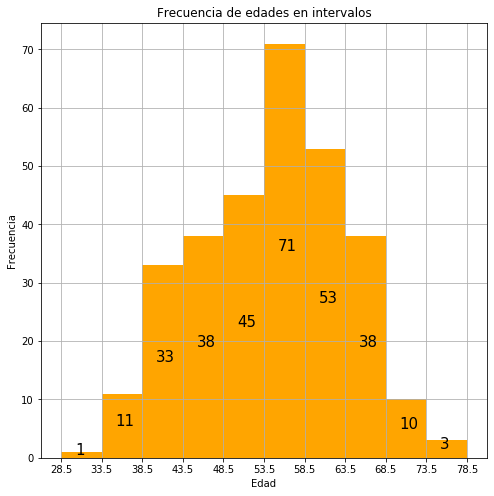

In [52]:
plt.figure(figsize = (8, 8))
n, bins, p = plt.hist(data['age'], bins=limites, color='orange')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de edades en intervalos')
plt.xticks(limites)

for i in range(len(n)):
    plt.text(x[i]-0.8, n[i]/2, int(n[i]), fontsize=15)

plt.grid(True)
    
plt.savefig('frec_edades.png')
plt.show()

### Diagrama de caja y bigotes

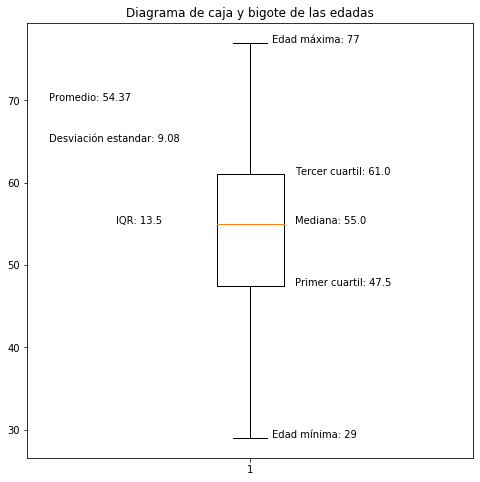

In [27]:
plt.figure(figsize = (8, 8))

col = 'age'

plt.boxplot(data[col])
plt.title('Diagrama de caja y bigote de las edadas')

plt.text(1.1, data[col].median(), f'Mediana: {data[col].median()}')
plt.text(1.1, data[col].quantile(0.25), f"Primer cuartil: {data[col].quantile(0.25)}")
plt.text(1.1, data[col].quantile(0.75), f"Tercer cuartil: {data[col].quantile(0.75)}")

iqr = data[col].quantile(0.75) - data[col].quantile(0.25)

plt.text(0.7, data[col].median(), f'IQR: {iqr}')

plt.text(0.55, 70, f'Promedio: {round(data[col].mean(), 2)}')
plt.text(0.55, 65, f'Desviación estandar: {round(data[col].std(), 2)}')

plt.text(1.05, data[col].min(), f'Edad mínima: {data[col].min()}')
plt.text(1.05, data[col].max(), f'Edad máxima: {data[col].max()}')

plt.show()

In [28]:
percentiles = [25, 50, 75]
cuartiles = np.percentile(data[col], percentiles)
cuartiles

array([47.5, 55. , 61. ])

### Distribución de los sexos

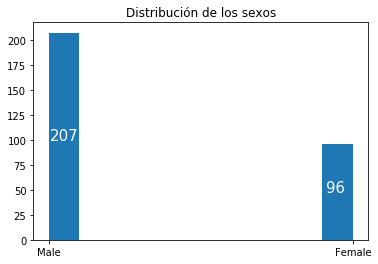

In [29]:
sex = data['sex'].copy()

males_count = sum(sex)
female_count = len(sex) - males_count

sex = sex.replace(1, 'Male')
sex = sex.replace(0, 'Female')

sex.hist()
plt.title('Distribución de los sexos')

plt.text(0.005, 100, males_count, color='white', fontsize=15)
plt.text(0.91, 48, female_count, color='white', fontsize=15)

plt.grid(False)
plt.show()

### Colesterol en la sangre

In [30]:
data[['chol', 'sex']].groupby('sex').mean()

,chol
sex,
0,261.302083
1,239.289855


In [31]:
# 0: Female
# 1: Male

data.pivot_table('chol', index='age', columns='sex', aggfunc='mean')

sex,0,1
age,,
29,NaN,204.000000
34,210.000000,182.000000
35,183.000000,224.000000
37,215.000000,250.000000
38,NaN,193.666667
39,209.500000,270.000000
40,NaN,196.333333
41,244.000000,205.166667
42,237.000000,250.000000


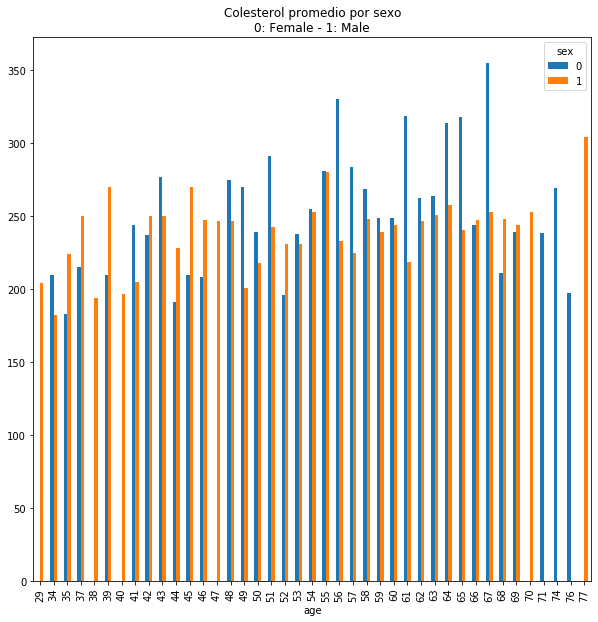

In [32]:
data.pivot_table('chol', index='age', columns='sex', aggfunc='mean').plot(kind='bar', figsize=(10, 10))
plt.title('Colesterol promedio por sexo\n0: Female - 1: Male')
plt.show()

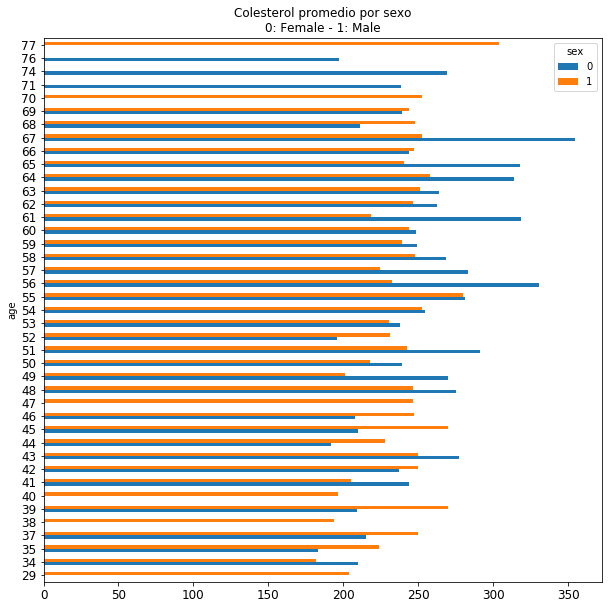

In [33]:
data.pivot_table('chol', index='age', columns='sex', aggfunc='mean').plot(kind='barh', figsize=(10, 10), fontsize=12)
plt.title('Colesterol promedio por sexo\n0: Female - 1: Male')
plt.show()

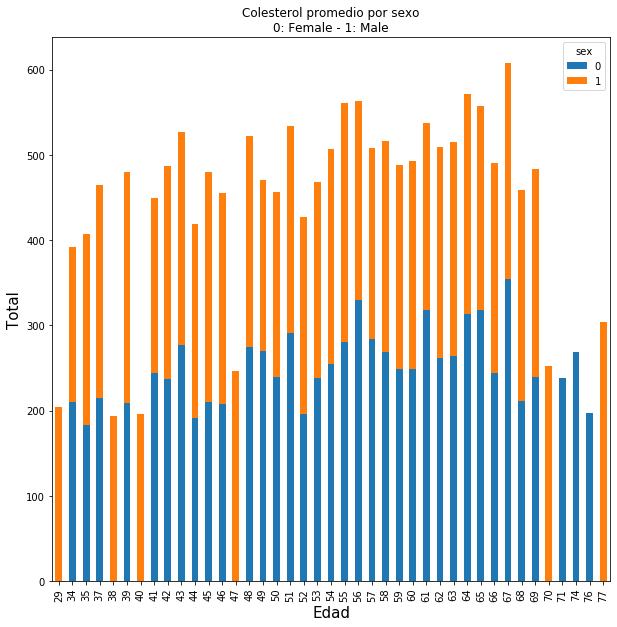

In [34]:
data.pivot_table('chol', index='age', columns='sex', aggfunc='mean').plot(kind='bar', figsize=(10, 10), stacked=True)
plt.title('Colesterol promedio por sexo\n0: Female - 1: Male')
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

In [46]:
# Valor 0: Angina típica
# Valor 1: Angina atípica
# Valor 2: Dolor no anginoso
# Valor 3: Asintomatico

print('Porcentaje de dolor de pecho de cada tipo')
(data['cp'].value_counts() / data.shape[0]) * 100

Porcentaje de dolor de pecho de cada tipo


0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: cp, dtype: float64